In [1]:
from pylab import *

In [2]:
def mi_Euler(ec_EDO , t , x0 , args=[] , delta=0.1):
    # ec_EDO es el sistema a integrar (t,x)
    # t es el intervalo de integracion
    # x0 punto inicial
    tiempos = arange(t[0],t[1]+delta,delta)
    M , N = len(x0) , len(tiempos)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        if len(args) == 0:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i])
        else:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i],args)
    return sol,tiempos

$$
\frac{dy^2}{dt^2} = -y + \cos(\omega t)
$$
con $y(0)=7$ y $y'(0) = 0$. 
Hacemos $u = \frac{dy}{dt}$ y por lo tanto $\frac{du}{dt} = \frac{dy^2}{dt^2} = -y + \cos(\omega t)$. Entonces:

$$
\frac{dy}{dt} = u \\
\frac{du}{dt} = -y + \cos(\omega t) 
$$
con condición inicial $(y,u) = (7,0)$

In [3]:
def ec_dif4(t,y,omega=[1.0]):
    return array([y[1],-y[0]+cos(omega[0]*t)])

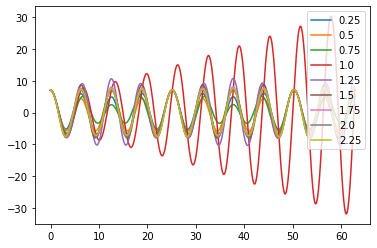

In [4]:
omegas = arange(0.25,2.5,0.25)
amps = zeros_like(omegas)
for i in range(len(omegas)):
    sol,t = mi_Euler(ec_dif4,[0,20*pi],[7,0],[omegas[i]],0.001)
    plot(t,sol[0],label=omegas[i])
legend()
show()

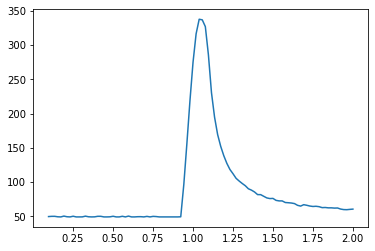

In [5]:
omegas = linspace(0.1,2,100)
amps = zeros_like(omegas)
for i in range(len(omegas)):
    sol,t = mi_Euler(ec_dif4,[0,10*pi],[7,0],[omegas[i]],0.001)
    amps[i] = (sol[0]**2).max()
plot(omegas,amps)
show()

In [41]:
def mi_Euler_Jacobi(ec_EDO , t , x0 , Jac_EDO , args=[] , delta=0.1):
    # ec_EDO es el sistema a integrar (t,x)
    # t es el intervalo de integracion
    # x0 punto inicial
    tiempos = arange(t[0],t[1]+delta,delta)
    M , N = len(x0) , len(tiempos)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        a_Euler = delta*ec_EDO(tiempos[i],sol[:,i])
        a_Jacobi = 0.5*delta*delta*dot(Jac_EDO(tiempos[i],sol[:,i]),ec_EDO(tiempos[i],sol[:,i]))
        sol[:,i+1] = sol[:,i] + a_Euler + a_Jacobi
    return sol,tiempos    

Variables $(y,u)$
$$
\frac{dy}{dt} = u \\
\frac{du}{dt} = -y
$$
La matriz Jacobiana es:
$$
\mathbb{J} = \left( 
\begin{array}{cc} 
0 & 1 \\
-1 & 0
\end{array}
\right)
$$

In [24]:
def ec_dif3(t,y):
    return array([y[1],-y[0]])

def ec_Jac_dif3(t,y):
    return array( [ [0,1] , [-1,0] ] )

In [59]:
sol_J,t_J = mi_Euler_Jacobi(ec_dif3,[0,4*pi],[7,0],ec_Jac_dif3,delta=0.1)
sol_E,t_E = mi_Euler(ec_dif3,[0,4*pi],[7,0],delta=0.01)

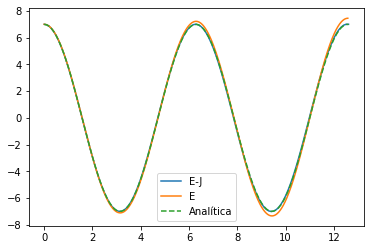

In [60]:
plot(t_J,sol_J[0],label='E-J')
plot(t_E,sol_E[0],label='E')
plot(t_J,7*cos(t_J),'--',label='Analítica')
legend()
show()

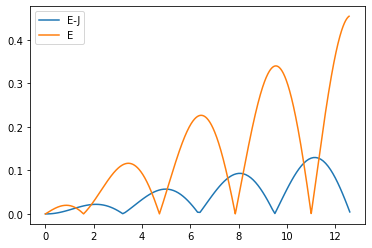

In [63]:
plot(t_J,abs(7*cos(t_J)-sol_J[0]),label='E-J')
plot(t_E,abs(7*cos(t_E)-sol_E[0]),label='E')
legend()
show()